<a href="https://colab.research.google.com/github/estercardosotoja/RNA_letters/blob/main/Digitos_Ester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAPIRUS TERRESTRIS

- Aprendizado Supervisionado
- CNN = Rede Neural Convolucional


### Importação das bibliotecas
- TensorFlow
- Numpy
- MatplotLib
- *PyDrive*

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
!pip install -U -q PyDrive  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

### DataSet
*Nosso DataSet está sendo utilizado o O Kaggle é uma plataforma de aprendizagem e competição para cientistas de dados.*

https://www.kaggle.com/datasets/olgabelitskaya/classification-of-handwritten-letters

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Separação por diretório
- Buscar os dados dos diretórios separando os dados de teste e validações

In [3]:
dataset_dir = os.path.join(os.getcwd(), '/content/drive/MyDrive/ColabNotebooks/Versão_Ester/letras')
#Letra a
dataset_train_dir_a = os.path.join(dataset_dir, '/train/letra_train_a')
dataset_train_len_a = len(os.listdir(os.path.join(dataset_dir, '/content/drive/MyDrive/ColabNotebooks/Versão_Ester/letras/train/letra_train_a')))
dataset_train_validation_a = os.path.join(dataset_dir, 'letra_a')
dataset_validation_len_a = len(os.listdir(os.path.join(dataset_dir, '/content/drive/MyDrive/ColabNotebooks/Versão_Ester/letras/validation/letra_a')))

#Letra e
dataset_train_dir_e = os.path.join(dataset_dir, '/train/letra_train_e')
dataset_train_len_e = len(os.listdir(os.path.join(dataset_dir, '/content/drive/MyDrive/ColabNotebooks/Versão_Ester/letras/train/letra_train_e')))
dataset_train_validation_e = os.path.join(dataset_dir, 'letra_e')
dataset_validation_len_e = len(os.listdir(os.path.join(dataset_dir, '/content/drive/MyDrive/ColabNotebooks/Versão_Ester/letras/validation/letra_e')))

print(f"Para treinar a letra a: {dataset_train_len_a}");
print(f"Para validar a letra a: {dataset_validation_len_a}");

print(f"Para treinar a letra e: {dataset_train_len_e}");
print(f"Para validar a letra e: {dataset_validation_len_e}");


Para treinar a letra a: 150
Para validar a letra a: 49
Para treinar a letra e: 150
Para validar a letra e: 50


Pré-Processamento

In [4]:
image_width = 32
image_height = 32
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 15
epochs = 20
learning_rate = 0.0001

class_names = ['a', 'e']

In [5]:
dataset_train_dir_a

'/train/letra_train_a'

Criação do DataSet com os dados de Treinamento
(Atualizar os parâmetros da rede neural)


In [6]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ColabNotebooks/Versão_Ester/letras/train',
    image_size = image_size,
    batch_size = batch_size,
    shuffle =  True
)

Found 300 files belonging to 2 classes.


In [7]:
dataset_train.class_names

['letra_train_a', 'letra_train_e']

Criação do DataSet com os dados de Validação
- Validação do modelo sem alterar os parametros


In [8]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/ColabNotebooks/Versão_Ester/letras/validation',
    image_size = image_size,
    batch_size = batch_size,
    shuffle =  True
)

Found 99 files belonging to 2 classes.


In [9]:
class_names

['a', 'e']

### Funções para Plotar as imagens dos DataSet

In [10]:
def plot_dataset(dataset):
    
    plt.gcf().clear()
    plt.figure(figsize = (8, 8))

    for features, labels in dataset.take(1):

      for i in range(10):
        plt.subplot(2, 10, i + 1)
        plt.axis('off')

        plt.imshow(features[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])

<Figure size 432x288 with 0 Axes>

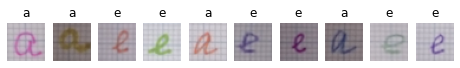

In [11]:
plot_dataset(dataset_train)

<Figure size 432x288 with 0 Axes>

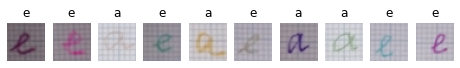

In [12]:
plot_dataset(dataset_validation)

### Geração de mais imagens para treinamento

In [13]:
data_augmentation = tf.keras.models.Sequential([ 
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

In [14]:
def plot_dataset_data_augmentation(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (6,6))

    for features, _ in dataset.take(1):

        feature = features[0]

        for i in range(9):

            feature_data_augmentation = data_augmentation(tf.expand_dims(feature,0))

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(feature_data_augmentation[0] / image_color_channel_size)


<Figure size 432x288 with 0 Axes>

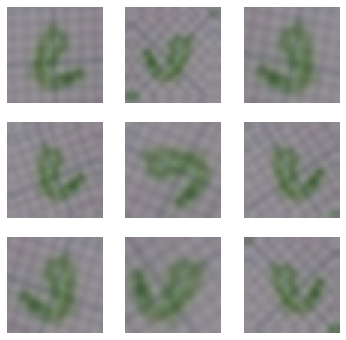

In [15]:
plot_dataset_data_augmentation(dataset_train)

### LAYER RESCALING
Uma camada de pré-processamento que redimensiona os valores de entrada para um novo intervalo.
Essa camada redimensiona cada valor de uma entrada (geralmente uma imagem) multiplicando por scalee adicionando offset.

In [16]:
rescaling = tf.keras.layers.experimental.preprocessing.Rescaling(1. / (image_color_channel_size / 2.), offset =-1 , input_shape = image_shape)

### TRANSFER LEARNING

In [ ]:
model_transfer_learning = tf.keras.applications.MobileNetV2(input_shape = image_shape, include_top = False, weights = 'imagenet')
model_transfer_learning.trainable = False
model_transfer_learning.summary()

EARLY STOPPING

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

MODEL

In [19]:
model = tf.keras.models.Sequential([
    rescaling, #normalização de valores
    data_augmentation,
    model_transfer_learning,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid') 
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                

In [20]:
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs,
    callbacks = [
        early_stopping
    ]
)

Epoch 1/20
20/20 [==============================] - 11s 189ms/step - loss: 0.7120 - accuracy: 0.5067 - val_loss: 0.7041 - val_accuracy: 0.5152
Epoch 2/20
20/20 [==============================] - 2s 82ms/step - loss: 0.7111 - accuracy: 0.4867 - val_loss: 0.7033 - val_accuracy: 0.5253
Epoch 3/20
20/20 [==============================] - 2s 63ms/step - loss: 0.7044 - accuracy: 0.5133 - val_loss: 0.7025 - val_accuracy: 0.5051
Epoch 4/20
20/20 [==============================] - 1s 46ms/step - loss: 0.7110 - accuracy: 0.4767 - val_loss: 0.7018 - val_accuracy: 0.5051
Epoch 5/20
20/20 [==============================] - 1s 44ms/step - loss: 0.7095 - accuracy: 0.4833 - val_loss: 0.7011 - val_accuracy: 0.5152
Epoch 6/20
20/20 [==============================] - 1s 45ms/step - loss: 0.7104 - accuracy: 0.4567 - val_loss: 0.7005 - val_accuracy: 0.5152


MODEL EVALUATION

In [21]:
dataset_test = dataset_validation

In [22]:
dataset_test_loss, dataset_test_accuracy = model.evaluate(dataset_test)

print('Dataset Test Loss:     %s' % dataset_test_loss)
print('Dataset Test Accuracy: %s' % dataset_test_accuracy)

7/7 [==============================] - 0s 18ms/step - loss: 0.7005 - accuracy: 0.5152
Dataset Test Loss:     0.7004815936088562
Dataset Test Accuracy: 0.5151515007019043


In [35]:
def plot_dataset_predictions(dataset):

    features, labels = dataset_test.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (10, 10))

    for i in range(9):

        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

Labels:      [0 1 0 0 0 1 0 0 0 1 1 0 0 0 1]
Predictions: [1 0 1 1 1 0 0 1 1 1 1 0 1 1 1]


<Figure size 432x288 with 0 Axes>

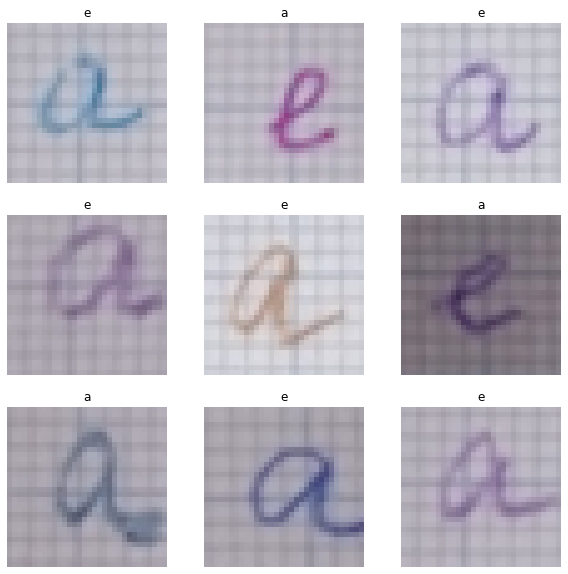

In [36]:
plot_dataset_predictions(dataset_test)

SAVE & LOAD

In [25]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


In [26]:
model = tf.keras.models.load_model('model')

PREDICTIONS

In [27]:
def predict(image_file):

    image = tf.keras.preprocessing.image.load_img(image_file, target_size = image_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.expand_dims(image, 0)

    prediction = model.predict(image)[0][0]

    print('Prediction: {0} | {1}'.format(prediction, ('a' if prediction < 0.5 else 'e')))

In [28]:
def predict_url(image_fname, image_origin):

    image_file = tf.keras.utils.get_file(image_fname, origin = image_origin)
    return predict(image_file)

In [43]:
predict('/content/drive/MyDrive/ColabNotebooks/Versão_Ester/a.png')

Prediction: 0.4631861746311188 | a


In [44]:
predict('/content/drive/MyDrive/ColabNotebooks/Versão_Ester/1133041.jpg')

Prediction: 0.558193027973175 | e


In [45]:
predict('/content/drive/MyDrive/ColabNotebooks/Versão_Ester/e4.png')

Prediction: 0.538070559501648 | e


In [46]:
predict('/content/drive/MyDrive/ColabNotebooks/Versão_Ester/e3.png')

Prediction: 0.5005881190299988 | e


In [47]:
predict('/content/drive/MyDrive/ColabNotebooks/Versão_Ester/e2.png')

Prediction: 0.547565758228302 | e


In [48]:
predict('/content/drive/MyDrive/ColabNotebooks/Versão_Ester/e..webp')

Prediction: 0.5035548210144043 | e


In [49]:
predict('/content/drive/MyDrive/ColabNotebooks/Versão_Ester/a6.png')

Prediction: 0.4986732304096222 | a


In [50]:
predict('/content/drive/MyDrive/ColabNotebooks/Versão_Ester/apple.jfif')

Prediction: 0.4986732304096222 | a


In [51]:
predict('/content/drive/MyDrive/ColabNotebooks/Versão_Ester/eng.jpg')

Prediction: 0.4986732304096222 | a


In [53]:
predict('/content/drive/MyDrive/ColabNotebooks/Versão_Ester/banana.png')

Prediction: 0.4733462333679199 | a
